In [1]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, roc_curve, auc, confusion_matrix

%matplotlib inline

In [2]:
%run 101-data_preprocessing.py

In [3]:
# load the model from disk
modelXGB = pickle.load(open(os.path.join(path_y_t1, 'best_model.pkl'), 'rb'))

In [4]:
y_pred = modelXGB.predict(X_valid)
y_pred_proba = modelXGB.predict_proba(X_valid)

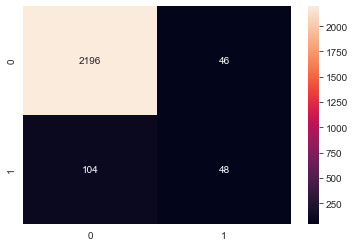

In [7]:
## plot the confusion matrix
sns.set_style('whitegrid')
cm = confusion_matrix(y_valid_t1, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

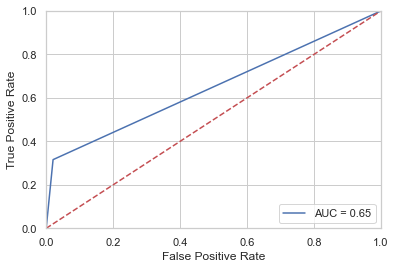

In [8]:
## plot the ROC curve
from sklearn.metrics import roc_curve, auc

sns.set_theme(style="whitegrid")
fpr, tpr, thresholds = roc_curve(y_valid_t1, y_pred)
roc_auc = auc(fpr, tpr)
sns.lineplot(x=fpr, y=tpr, label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.0,1.0])
plt.ylim([-0.0,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [8]:
## pred the test data and save it
y_pred_test = modelXGB.predict_proba(X_test)[::,1]
y_pred_test = pd.DataFrame(y_pred_test, columns=['Predicted'])

X_test_1 = pd.read_csv(os.path.join(path_X, 'X_test.csv'), index_col=[0], header=[0,1,2])
y_pred_test.index = X_test_1.index # set the index
y_pred_test.reset_index(inplace=True) # reset the index
y_pred_test.to_csv(os.path.join(path_y_t1, 'y_test.csv'), index=False)